All_File_info.xls
PSA
PSA
EQo_94_19_42.jpg


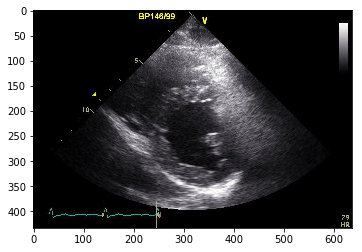

hererer


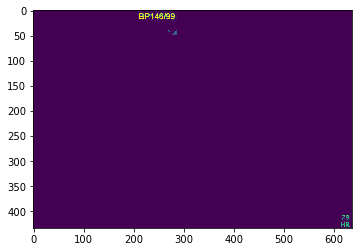

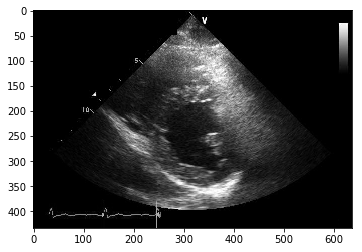

hererer


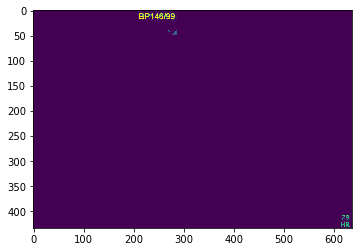

PSA
/data/Gurpreet/Echo/Sorted_Images/PSA/EQo_94_19_42.jpg
'GE Vingmed Ultrasound' 636 434


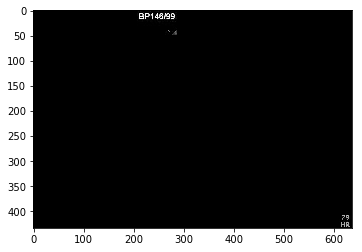

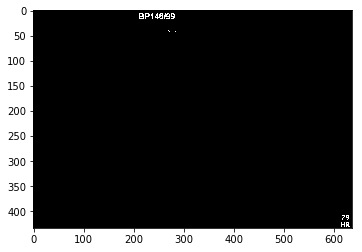

(434, 636)
<class 'numpy.ndarray'>
(26, 2)


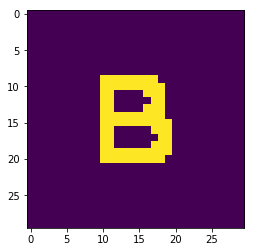

In [3]:
import skimage.io as io

from skimage.filters import threshold_mean as tm
from skimage.filters import threshold_otsu as to
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_uint
from conv import *
from skimage import io
from glc import *

import pandas as pd
path='/data/Gurpreet/Echo/Sorted_Images/'
import os


####### NOTE - remember to check what are in the directories used below once you get access to the server
####### you might also want to change the 'gabriel' parts to your work directory in /data/




### rev_dic= {'<image_name>':'<string containing Manufacturer and resolution'}
### helps me map image name to the manufacturer info of the Echo Machine

for a in os.listdir("/data/gabriel/OCR/"):
    #print(a)
    if('All' in a and 'lock' not in a):
        print(a)
        data = pd.ExcelFile("/data/gabriel/OCR/"+a,header=None).parse('Sheet1')
dic = {}

#a = np.unique(np.array(data[1]))
#print(a)

count = 0
#print(data.iloc[0])



for i in range(0,len(data)):
    #print(data[i])
    #print(data.iloc[i][0],data.iloc[i][1],data.iloc[i][2],data.iloc[i][3],data.iloc[i][4])
    temp = list(data.iloc[i])
    #print(temp)
    #print(temp[0],temp[1],temp[2],temp[3],temp[4])
    count+=1
    #if(temp[0])not in dic:
         #'EQo_62_22_13.jpg'
    #    dic[temp[0]] = {}
    
    if(str(temp[3])+' '+str(temp[4])+' '+str(temp[5]) not in dic):
        
        dic[str(temp[3])+' '+str(temp[4])+' '+str(temp[5])] = []
    
    dic[str(temp[3])+' '+str(temp[4])+' '+str(temp[5])].append('EQo_'+str(eval(temp[0]))+'_'+str(eval(temp[1]))+'_'+str(temp[2])+'.jpg')
    

lis={}
for i,j,k in os.walk('/data/Gurpreet/Echo/Sorted_Images'):
    #print(i)
    #print(j)
    #print(k)
    
    if len(j)==0:
        for z in k:
            #print(z)
            for s in dic:
                if z in dic[s]:
                    if(s not in lis):
                        lis[s]=[]
                    lis[s].append(z)
            #lis = {s:lis[s].append(z) for s in dic if z in dic[s]}
            #print(lis)
            #break
        #break
            
    #print(k)
rev_dic= {}
for i in lis:
    for j in lis[i]:
        if(j not in rev_dic):
            rev_dic[j]=None
        rev_dic[j]=i

        
### Below part executes the entire pipeline to extract each charecter present in images.
        
def extract_text():
    subd = ['PSA', 'SCX', 'SSX', 'A4C', 'A2C', 'PLA', 'A3C']
    count=0
    for i in subd:
        #print(i)
        count+=1
        print(i)
        for j in rev_dic.keys():
            print(i)
            print(j)
            if j in os.listdir('/data/Gurpreet/Echo/Sorted_Images/' + str(i) ):
                
                rimg = plt.imread('/data/Gurpreet/Echo/Sorted_Images/' + i+'/'+j)
                plt.imshow(rimg,cmap='gray'),plt.show()
                ok = get_echo(rimg=plt.imread('/data/Gurpreet/Echo/Sorted_Images/' + i+'/'+j),company=rev_dic[j][1:-9],R = int(rev_dic[j][-7:-4]),C = int(rev_dic[j][-3:]),ocr_flag=0)
                #io.imsave('/data/gabriel/OCR/test'+str(count)+'.png',(ok)) 
                
                plt.imshow(ok,cmap='gray'),plt.show()
                im,ekg = get_echo(rimg=plt.imread('/data/Gurpreet/Echo/Sorted_Images/' + i+'/'+j),company=rev_dic[j][1:-9],R = int(rev_dic[j][-7:-4]),C = int(rev_dic[j][-3:]),ocr_flag=1)
                print(i)
                print('/data/Gurpreet/Echo/Sorted_Images/' + i+'/'+j)
                print(rev_dic[j])
                plt.imshow(im,cmap='gray'),plt.show()
                
                thresh = to(im)
                
                binary = im>thresh
                plt.imshow(binary,cmap='gray'),plt.show()
                #io.imsave('/data/gabriel/OCR/test'+str(count)+'.png',(binary)) 
                
                print(binary.shape)
                print(type(binary))
                bbox = get_glyphs(binary)
                #break
                
                #im=img_as_uint(im)
                
                #bbox = get_glyphs(binary)
                part=im
                for p in range(0,len(bbox)):
               
                    count+=1
                    t_img = z_pad(binary[bbox[p][0]:bbox[p][2],bbox[p][1]:bbox[p][3]])
                    #plt.imshow(t_img),plt.show()
                    #return
                    ### below is to save the images.
                    #io.imsave('/data/gabriel/OCR/'+str(count)+'.png',t_img) 
                    
            
extract_text()       